In [1]:
print('start')

start


In [2]:
import pandas as pd
import numpy as np

from hdfs import InsecureClient


# Hadoop

In [3]:
fs = InsecureClient('http://bdata.iptime.org:9999/', user='hadoop')
fs_path, file_name = '/user/hadoop/sports', '규칙적_체육활동_참여율_주_1회_이상__연도별_비교_20250114092534.csv'
with fs.read(f'{fs_path}/{file_name}', encoding='euc-kr') as reader:
    data = pd.read_csv(reader)

data.tail()

,통계분류(1),통계분류(2),2003,2006,2008,2009,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,연령별,30대,56.2,56.1,40.9,46.5,39.6,53.1,53.2,56.8,60.7,61.9,70.3,58.6,57.5,65.3,64.7
5,연령별,40대,71.2,66.0,47.4,55.7,50.0,56.1,61.2,61.1,60.4,65.7,70.3,61.3,63.7,65.1,64.1
6,연령별,50대,65.7,68.0,48.6,58.1,50.8,57.4,60.0,60.8,60.4,64.5,70.8,64.4,61.0,63.9,66.5
7,연령별,60대,58.7,46.5,46.1,57.5,47.3,58.0,59.6,61.4,61.7,63.6,69.0,62.1,63.2,59.6,68.0
8,연령별,70세이상,0.0,30.3,32.8,46.0,41.4,45.0,49.7,55.3,54.6,59.8,57.8,57.0,58.3,54.3,60.6


In [4]:
data_p = data.copy()
data_p.rename(columns={'통계분류(1)':'1','통계분류(2)':'gender-ages'}, inplace=True)
del data_p['1']
data_p

,gender-ages,2003,2006,2008,2009,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,남자,63.6,64.2,46.4,55.2,46.6,57.5,58.2,62.3,60.1,61.6,68.1,59.9,60.1,60.4,62.8
1,여자,55.1,52.0,38.3,45.3,40.0,52.0,53.8,56.7,58.4,62.8,65.1,60.3,61.4,62.0,61.9
2,10대,57.8,52.1,38.8,44.7,36.6,54.7,49.0,63.1,60.4,57.2,50.1,52.0,55.0,52.6,47.9
3,20대,49.5,61.7,38.0,44.3,35.9,56.0,54.9,57.3,55.2,59.3,69.2,60.9,63.6,62.1,57.6
4,30대,56.2,56.1,40.9,46.5,39.6,53.1,53.2,56.8,60.7,61.9,70.3,58.6,57.5,65.3,64.7
5,40대,71.2,66.0,47.4,55.7,50.0,56.1,61.2,61.1,60.4,65.7,70.3,61.3,63.7,65.1,64.1
6,50대,65.7,68.0,48.6,58.1,50.8,57.4,60.0,60.8,60.4,64.5,70.8,64.4,61.0,63.9,66.5
7,60대,58.7,46.5,46.1,57.5,47.3,58.0,59.6,61.4,61.7,63.6,69.0,62.1,63.2,59.6,68.0
8,70세이상,0.0,30.3,32.8,46.0,41.4,45.0,49.7,55.3,54.6,59.8,57.8,57.0,58.3,54.3,60.6


# 성별 참여율

In [26]:
cols = [c for c in data_p.columns if c >= '2015']
data_m = data_p[cols]
# print(data_p)
data_m = pd.melt(data_p, id_vars='gender-ages', value_vars=data_p.columns[1:], var_name='year', value_name='rate')
# data_m.head(20)
data_m['year'] = pd.to_datetime(data_m['year'], format='%Y')
data_s = data_m[data_m['gender-ages'].isin(['남자', '여자'])]
data_s = data_s[data_s['year'] >= '2015-01-01']
# data_m['ages'].dropna(ignore_index=True)
# data_s = data_s.groupby('year')['rate'].mean().reset_index(name='rate')
data_s.rename(columns={'gender-ages':'gender'}, inplace=True)
data_s

,gender,year,rate
54,남자,2015-01-01,58.2
55,여자,2015-01-01,53.8
63,남자,2016-01-01,62.3
64,여자,2016-01-01,56.7
72,남자,2017-01-01,60.1
73,여자,2017-01-01,58.4
81,남자,2018-01-01,61.6
82,여자,2018-01-01,62.8
90,남자,2019-01-01,68.1
91,여자,2019-01-01,65.1


## For Graph..

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [8]:
plt.style.use('default')

d2coding_path = 'D2Coding-Ver1.3.2-20180524.ttf' # 폰트 경로
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
years = list(data_s['year'].drop_duplicates())
genders = list(data_s['gender'].drop_duplicates())
colors = ['darkorange', 'hotpink']
fontdict = {'size': 14, 'color': 'red'}

fig, ax = plt.subplots(figsize=(15, 10))

for gen, color in zip(genders, colors):
    sn = data_s[data_s['gender'] == gen]
    ax.plot(sn['year'], sn['rate'], linewidth=1.25, color=color, marker='s', linestyle='-')
    
ax.set_facecolor('#eee8')
ax.set_xlabel('연도 (년)', loc='right', fontdict=fontdict)
ax.set_ylabel('참여율 (%)', loc='top', fontdict=fontdict)
ax.grid(axis='both', linewidth=0.5, linestyle=(1, (2, 10)), color='#666')
ax.set_xmargin(0.075)
ax.set_ylim([52, 70])
ax.legend(genders, loc='upper left', fontsize='x-large', facecolor='#def')
plt.title('성별 규칙적 생활체육 참여율', fontdict={'color':'darkblue', 'size':20})
plt.savefig('../resultData/성별참여율.png')
plt.show()

# 연령대별 참여율

In [32]:
cols = [c for c in data_p.columns if c >= '2015']
data_m = data_p[cols]
# print(data_p)
data_m = pd.melt(data_p, id_vars='gender-ages', value_vars=data_p.columns[1:], var_name='year', value_name='rate')
# data_m.head(20)
data_m['year'] = pd.to_datetime(data_m['year'], format='%Y')
data_s = data_m[data_m['gender-ages'].isin([f'{s}대' for s in range(20, 70, 10)])]
data_s = data_s[data_s['year'] >= '2015-01-01']
data_s.rename(columns={'gender-ages':'ages'}, inplace=True)
data_s

,ages,year,rate
57,20대,2015-01-01,54.9
58,30대,2015-01-01,53.2
59,40대,2015-01-01,61.2
60,50대,2015-01-01,60.0
61,60대,2015-01-01,59.6
66,20대,2016-01-01,57.3
67,30대,2016-01-01,56.8
68,40대,2016-01-01,61.1
69,50대,2016-01-01,60.8
70,60대,2016-01-01,61.4


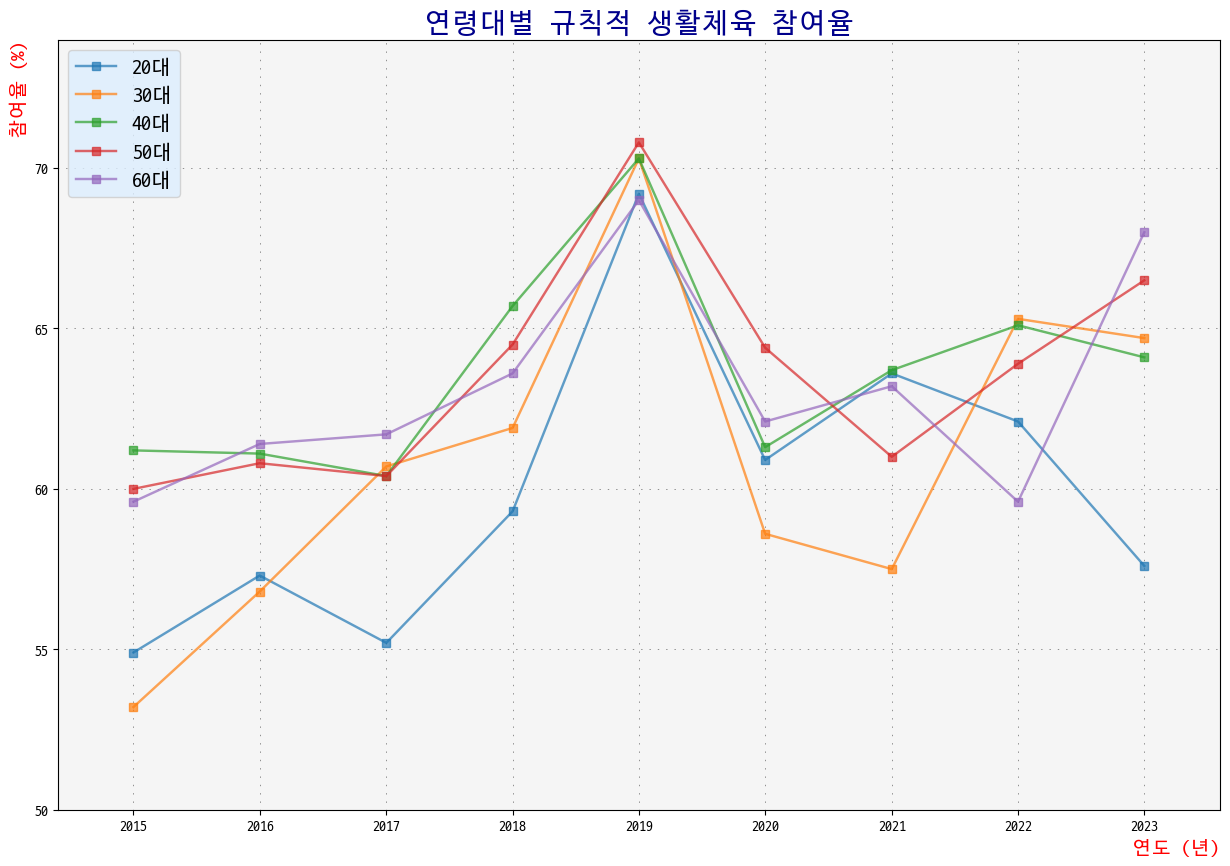

In [39]:
years = list(data_s['year'].drop_duplicates())
ages = list(data_s['ages'].drop_duplicates())
fontdict = {'size': 14, 'color': 'red'}

fig, ax = plt.subplots(figsize=(15, 10))

for age in ages:
    sn = data_s[data_s['ages'] == age]
    ax.plot(sn['year'], sn['rate'], linewidth=1.75, marker='s', linestyle='-', alpha=0.7)
    
ax.set_facecolor('#eee8')
ax.set_xlabel('연도 (년)', loc='right', fontdict=fontdict)
ax.set_ylabel('참여율 (%)', loc='top', fontdict=fontdict)
ax.grid(axis='both', linewidth=0.5, linestyle=(1, (2, 10)), color='#666')
ax.set_xmargin(0.075)
ax.set_ylim([50, 74])
ax.legend(ages, loc='upper left', fontsize='x-large', facecolor='#def')
plt.title('연령대별 규칙적 생활체육 참여율', fontdict={'color':'darkblue', 'size':20})
plt.savefig('../resultData/연령대별참여율.png')
plt.show()